<div style="width:100%;border-collapse:separate;border:solid 2px;border-radius:14px;">
    <div style="display:flex;">
        <div style="display:inline;width:5%;"></div>
        <div style="display:inline;width:15%;">NSIT</div>
        <div style="display:inline;width:15%;">16a</div>
        <div style="display:inline;width:70%;text-align:right;"><b>Langages et programmation</b></div>
        <div style="display:inline;width:5%;"></div>
    </div>
    <div  style="display: flex;background-color:#EEE">
        <p style="width:100%;text-align:center;">Calculabilité,décidabilité.</p>
    </div>
    <div  style="display: flex;">
        <p style="width:100%;text-align:center;">Programme en tant que donnée. Problème de
l’arrêt</p>
    </div>
</div>

<div class = "alert alert-success">
    
**Objectifs de la séquence:** 
    
- Comprendre que tout programme est aussi une donnée.
- Montrer que le problème de l’arrêt est indécidable.
</div>

![Moto_arret](https://github.com/ebuonocore/NSIT_17_Calculabilite/blob/main/a_intro/joebarteam_stop.png?raw=true)
<span style="font-family:Comic Sans MS; color:gray; font-size: x-small;float:right ">Source: <a href="https://www.pourlascience.fr/sd/mathematiques/un-nouveau-record-de-decimales-de-pi-3871.php">Joe Bar Team</a></span> 

<div class = "alert alert-info">
    
**Sommaire :**
- <a href=#problematique>Problématique</a> 
- <a href=#while>Détection de boucles 'while'</a> 
- <a href=#rec>Détection de fonctions récursives</a> 
- <a href=#Turing>La réponse d'Alain Turing</a> 

<div id="problematique"></div>

# Problématique

Petit rappel sur la notion de correction d'un programme.  
Un  programme est **correct** si:
- **Correction partielle:** il réalise ce qu'on attend de lui
- **Terminaison:** il s'arrêt un jour. (Si possible dans une délai satisfaisant à l'échelle de l'humanité)

En effet, on peut très bien faire un programme qui calcule par exemple les décimales de $\displaystyle \pi$ mais qui ne s'arrête jamais. Ce dernier ne serait que partiellement correct.

![decimales_pi](https://github.com/ebuonocore/NSIT_17_Calculabilite/blob/main/a_intro/pi.png?raw=true)
<span style="font-family:Comic Sans MS; color:gray; font-size: x-small;float:right ">Source: <a href="https://www.pourlascience.fr/sd/mathematiques/un-nouveau-record-de-decimales-de-pi-3871.php">pourlascience.fr</a>(De nouvelles décimales de π)</span> 

Nous allons nous intéresser au problème de la terminaison des programmes:  

<div class = "alert alert-success">
  
Est-il  possible d'analyser un code et d'en conclure s'il va s'arreter ou non?

En cours, nous avons identifié au moins deux cas où un programme pourrait tomber dans une boucle infinie:
- Un invariant de boucle qui n'évolue pas vers un état permettant de sortir d'une boucle $while$
- Un programme récursif où les cas de base ne sont jamais atteints

Dans un premier temps, nous allons voir s'il est possible de détecter la présence de ces indices dans différents programmes.  

La fonction $récupère\_programme()$ ci-dessous va nous permettre de récupérer différents programmes Python stockés dans un répertoire d'un Github.  
Les programmes portent des noms allant de $a.py$, $b.py$ ... à $k.py$.  

In [ ]:
# Importation des données depuis un fichier hébergé sur Github
import urllib.request

def récupère_programme(fichier:str)->str:
    """ Renvoie la liste des lignes d'un programme.
        Le paramètre fichier désigne le nom du fichier à ouvrir dans le répertoire Github
        sans l'extension .py
    """
    repertoire = "https://github.com/ebuonocore/NSIT_17_Calculabilite/blob/main/a_intro/progs/"
    # Construction du chemin complet vers le fichier
    destination = repertoire + fichier + ".py?raw=true"
    req = urllib.request.Request(destination)
    # Ouverture du fichier
    with urllib.request.urlopen(req) as response:
        donnees = response.read().decode("utf8") # Lecture des données
    lignes = donnees.split("\n") # Construction de la liste des lignes du fichier
    return lignes

Les lignes suivantes permettent d'afficher le programme $a.py$  
Faites l'essai avec d'autres valeurs du paramètre pour afficher $b.py$ ou $k.py$

In [ ]:
lignes = récupère_programme("a")
print(*lignes, sep="\n") # Affichage des lignes du fichier récupéré

<div id="while"></div>

# Détection de boucles 'while'

Complétez la fonction $détecte\_while()$ qui prend le nom d'un programme en paramètre (sans l'extension .py) et qui renvoie $True$ si l'instruction $while$ est présente.  
Sinon, elle renvoie $False$

In [ ]:
def détecte_while(fichier:str)->bool:
    """ Prend le nom d'un programme en paramètre (sans l'extension .py) 
        Renvoie 𝑇𝑟𝑢𝑒 si l'instruction 𝑤ℎ𝑖𝑙𝑒 est présente en dehors des commentaires et des spécifications.
    """
    lignes = récupère_programme(fichier)
    ...

In [ ]:
# Lance la détection de boucle while sur l'ensemble des fichiers du répertoire
print("Détection de la présence de boucle while dans le code")
for indice_fichier in range(11):
    nom_fichier = chr(ord('a') + indice_fichier)
    print(nom_fichier+".py : ", détecte_while(nom_fichier))

<details style="details[open] summary::-webkit-details-marker { color:#eaeaea; background:#f7f7f7; outline: 1px
solid #ADCA48;}">
<summary style="summary::-webkit-details-marker { color:#ADCA48; background:#e2ecda;} ">
    &#x1F511; Réponse attendue</summary>
Si votre programme répond positiviement aux programmes $c.py$ et $f.py$ c'est que vous détecter des 'faux-positifs' dans les commentaires et les spécifications.<br>
Le seul programme à surveiller ici est $k.py$
</details>

<details style="details[open] summary::-webkit-details-marker { color:#eaeaea; background:#f7f7f7; outline: 1px
solid #ADCA48;}">
<summary style="summary::-webkit-details-marker { color:#ADCA48; background:#e2ecda;} ">
    &#x2705; Correction(s)</summary>
Une première version qui détecte tous les 'while', même ceux qui sont inoffensifs dans les commentaires:
<code>
def détecte_while(fichier:str)->bool:
    lignes = récupère_programme(fichier)
    for ligne in lignes:
        if 'while' in ligne:
            return True
    return False
</code> 
    
Ne tient pas compte de la présence de la chaîne 'while' dans les commentaires:
<code>
def détecte_while(fichier:str)->bool:
    lignes = récupère_programme(fichier)
    for ligne in lignes:
        ligne_code = ligne.split('#')[0]
        if 'while' in ligne_code:
            return True
    return False
</code> 
    
Ne tient pas compte de la présence de la chaîne 'while' dans les spécifications:
<code>
def détecte_while(fichier:str)->bool:
    lignes = récupère_programme(fichier)
    spécifications = False
    for ligne in lignes:
        ligne_code = ligne.split('#')[0]
        if "\\"\\"\\"" in ligne_code:
            spécifications = not spécifications
        if not spécifications:
            if 'while' in ligne_code:
                return True
    return False
</code> 
</details>

<div id="rec"></div>

# Détection de fonctions récursives

Pour faire fonctionner le programme suivant, nous allons avoir besoin de la fonction $indentation()$ qui renvoie la position du premier caractère qui n'est pas un espace dans une ligne:

In [ ]:
def indentation(ligne:str)->int:
    """ Renvoie la position du premier caractère qui n'est pas un espace dans une ligne
        >>> indentation("    def ma_fonction():")
        4
    """
    ...

<details style="details[open] summary::-webkit-details-marker { color:#eaeaea; background:#f7f7f7; outline: 1px
solid #ADCA48;}">
<summary style="summary::-webkit-details-marker { color:#ADCA48; background:#e2ecda;} ">
    &#x2705; Correction(s)</summary>
Une première version qui détecte tous les 'while', même ceux qui sont inoffensifs dans les commentaires:
<code>
def indentation(ligne:str)->int:
    for i in range(len(ligne)):
        if ligne[i] != " ":
            return i
    return 0
</code> 

On donne la fonction $détecte\_rec()$ qui prend le nom d'un fichier en paramètre (sans l'extension .py), explore chacune des fonctions définie, trouve son nom et recherche la présence d'un appel récursif.  
Pour mieux en comprendre le fonctionnement, vous pouvez vous référer aux descriptions des méthodes <a href="https://www.w3schools.com/python/ref_string_find.asp">$find()$</a> et <a href="https://www.w3schools.com/python/ref_string_index.asp">$index()$</a> qui permettent de vérifier la présence ou la position d'une chaîne de caractère.

In [ ]:
def détecte_rec(fichier:str)->bool:
    """ Prend le nom d'un programme en paramètre (sans l'extension .py) 
        Renvoie 𝑇𝑟𝑢𝑒 si un appel récursif est présent dans le programme.
    """
    lignes = récupère_programme(fichier)
    spécifications = False
    cherche_fonction = False
    indentation_fonction = 0
    for ligne in lignes:
        if cherche_fonction:
            ligne_code = ligne.split('#')[0]
            if "\"\"\"" in ligne_code:
                spécifications = not spécifications
            if not spécifications:
                if nom_fonction in ligne_code:
                    # print(nom_fonction,"trouvé")
                    return True
        # Arrête la recherche si l'indentation retombe par rapport à la definition de la fonction
        if indentation(ligne) <= indentation_fonction:
            cherche_fonction = False
        # Recherche le nom de la fonction qui vient d'être définie
        if ligne.find("def")!=-1 and ligne.find("(")!=-1:
            fin_nom = ligne.index("(")
            debut_nom = ligne.index("def ") + 4
            nom_fonction = ligne[debut_nom:fin_nom]
            cherche_fonction = True        
    return False

In [ ]:
# Lance la détection d'appels récursifs sur l'ensemble des fichiers du répertoire
print("Détection de la présence de fonction récursive dans le code")
for indice_fichier in range(11):
    nom_fichier = chr(ord('a') + indice_fichier)
    print(nom_fichier+".py : ", détecte_rec(nom_fichier))

Remarque: En enlevant le commentaire devant $print(nom\_fonction,"trouvé")$ dans la fonction $détecte\_rec()$, vous pouvez faire apparaitre les noms des fonctions suspectes trouvées.

<div id="Turing"></div>

# La réponse d'Alain Turing

<div class = "alert alert-info">
    Nous venons de voir qu'un programme informatique peut être analysé, de la même façon qu'un simple fichier texte afin de dépister des risques pour sa terminaison.<br>
    Ainsi, un <b>programme peut prendre un autre programme en paramètre</b> pour l'analyser.<br>  
Mais ça, nous l'avions déjà un peu abordé avec la programmation fonctionnelle.

![arrêt_a](https://github.com/ebuonocore/NSIT_17_Calculabilite/blob/main/a_intro/arret_a.png?raw=true)

<div class = "alert alert-danger">
    Mais on devine que faire la <b>preuve</b> de la terminaison ou de la non-terminaison d'un programme va être beaucoup plus complexe.

La fonction suivante contient une boucle $while$.  
A priori pour toute valeur entière passée en argument, elle devrait bien se terminer.

In [76]:
def une_bonne_boucle(n):
    i = 0
    while i!=n:
        print("Jusqu'ici tout va bien")
        i += 1
    print("C'est fini ;)")

une_bonne_boucle(5)    

Jusqu'ici tout va bien
Jusqu'ici tout va bien
Jusqu'ici tout va bien
Jusqu'ici tout va bien
Jusqu'ici tout va bien
C'est fini ;)


Par contre, avec un flottant, le même programme va faire transpirer l'ordinateur.  
*(Vous avez un petit bouton carré* ⬛ *dans le menu en haut pour arrêter le programme...)*   

In [ ]:
une_bonne_boucle(5.1)  

Analyser le code ne suffit pas. Il faut prendre en compte l'environnement dans lequel elle s'exécute: les valeurs des arguments.

![arrêt_b](https://github.com/ebuonocore/NSIT_17_Calculabilite/blob/main/a_intro/arret_b.png?raw=true)
![arrêt_c](https://github.com/ebuonocore/NSIT_17_Calculabilite/blob/main/a_intro/arret_c.png?raw=true)

<div class = "alert alert-success">
    Nous allons voir quelle réponse radicale <b>Alain Turing</b> a apporté au problème de l'arrêt:<br>
D'une façon générale, est-il possible d'écrire un programme $halt()$ qui prend en paramètre une fonction et ses paramètres qui détermine si notre fonction va s'arrêter ou pas?

Je vous invite à voir les deux vidéos:  
La première est en anglais mais ce n'est pas la langue qui pose un problème de compréhension...  
La seconde permettra d'enfoncer le clou, c'est tellement délicat comme démonstration que deux approches sont nécessaires à mon avis.

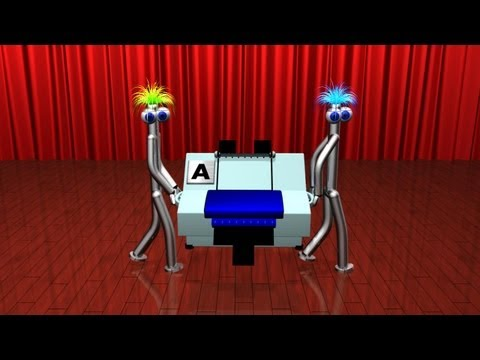

In [2]:
# Exécutez ce code pour voir la vidéo
from IPython.display import YouTubeVideo
YouTubeVideo('92WHN-pAFCs', width = 800, height = 600)
# Proof That Computers Can't Do Everything (The Halting Problem)(7min51s) 

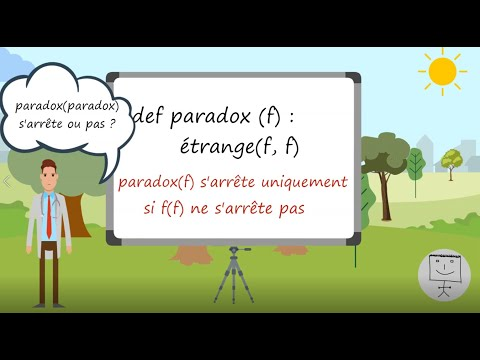

In [1]:
# Exécutez ce code pour voir la vidéo
from IPython.display import YouTubeVideo
YouTubeVideo('13O1qhX4Bqo', width = 800, height = 600)
# Calculabilité : le problème de l'arrêt par le professeur Karré(4min50s) 

---
<p style="font-family:Comic Sans MS; text-align: center; color:gray; font-size: x-small; ">- Eric Buonocore. mai 2021 -<br></p>

![Licence CC BY NC SA](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)